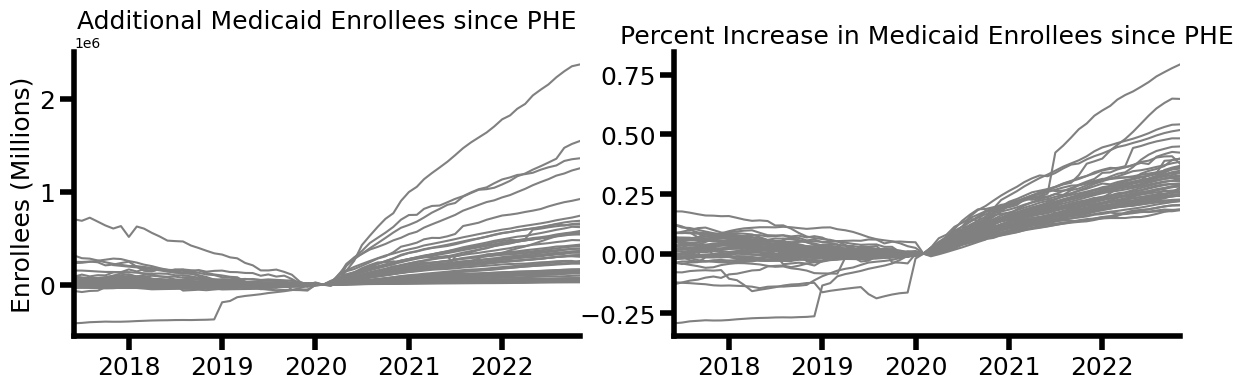

In [1]:
from matplotlib import pyplot as plt 
import pandas as pd 
import numpy as np
import datetime

df = pd.read_csv('C://Users/aronsonm/Documents/HealthEquityDataJam/medicaidenrollment.csv')
df["report_date"] = pd.to_datetime(df["report_date"]).dt.date


# Plot State-by-state Medicaid enrollment
plt.figure(figsize=(12,4))
state_abrevs = df.state_abbreviation.unique()
baseline = datetime.date(year=2020,month=2,day=1)
for i in range(len(state_abrevs)):
    statedf = df[(df['state_abbreviation']==state_abrevs[i]) & (df['final_report'] == 'Y')]
    dates = statedf["report_date"].to_numpy()
    enrollees = statedf["total_medicaid_and_chip_enrollment"].to_numpy()
    
    plt.subplot(1,2,1)
    plt.plot(dates[1::],enrollees[1::]-enrollees[np.where(dates==baseline)[0][0]],color='gray',label=state_abrevs[i])

    plt.subplot(1,2,2)
    plt.plot(dates[1::],enrollees[1::]/enrollees[np.where(dates==baseline)[0][0]]-1,color='gray',label=state_abrevs[i])

ax = plt.subplot(1,2,1)
ax.set_title('Additional Medicaid Enrollees since PHE',fontsize=18)
ax.set_ylabel('Enrollees (Millions)',fontsize=18)
ax.set_xlim([dates[1],dates[-1]])
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.tick_params(axis='both',length=10,width=4,labelsize=18)

ax = plt.subplot(1,2,2)
ax.set_title('Percent Increase in Medicaid Enrollees since PHE',fontsize=18)
ax.set_xlim([dates[1],dates[-1]])
ax.spines['left'].set_linewidth(4)
ax.spines['bottom'].set_linewidth(4)
ax.spines['right'].set_linewidth(0)
ax.spines['top'].set_linewidth(0)
ax.tick_params(axis='both',length=10,width=4,labelsize=18)

plt.tight_layout()

In [5]:
statedf

,state_abbreviation,state_name,report_date,state_expanded_medicaid,preliminary_updated,final_report,new_applications_submitted_to_medicaid_and_chip_agencies,new_applications_submitted_to_medicaid_and_chip_agencies__f_85d7,applications_for_financial_assistance_submitted_to_the_stat_104d,applications_for_financial_assistance_submitted_to_the_stat_c640,...,total_medicaid_and_chip_determinations,total_medicaid_and_chip_determinations__footnotes,medicaid_and_chip_child_enrollment,medicaid_and_chip_child_enrollment__footnotes,total_medicaid_and_chip_enrollment,total_medicaid_and_chip_enrollment__footnotes,total_medicaid_enrollment,total_medicaid_enrollment__footnotes,total_chip_enrollment,total_chip_enrollment__footnotes
6457,WY,Wyoming,2013-09-01,N,U,Y,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,67518.0,NaN,NaN,NaN,NaN,NaN
6459,WY,Wyoming,2017-06-01,N,U,Y,1402.0,Does Not Include All Medicaid Applications Sub...,0.0,NaN,...,0.0,NaN,37493.0,NaN,60822.0,NaN,56558.0,NaN,4264.0,NaN
6463,WY,Wyoming,2017-09-01,N,U,Y,1794.0,NaN,0.0,NaN,...,808.0,NaN,41627.0,NaN,62088.0,NaN,57578.0,NaN,4510.0,NaN
6465,WY,Wyoming,2017-10-01,N,U,Y,1763.0,NaN,0.0,NaN,...,786.0,NaN,41657.0,NaN,62217.0,NaN,57609.0,NaN,4608.0,NaN
6467,WY,Wyoming,2017-11-01,N,U,Y,2276.0,NaN,0.0,NaN,...,706.0,NaN,41257.0,NaN,61639.0,NaN,56989.0,NaN,4650.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6579,WY,Wyoming,2022-07-01,N,U,Y,923.0,Includes Administrative Data Transfers; Does N...,0.0,NaN,...,1217.0,NaN,50926.0,NaN,79318.0,NaN,74221.0,NaN,5097.0,NaN
6581,WY,Wyoming,2022-08-01,N,U,Y,1200.0,Includes Administrative Data Transfers; Does N...,0.0,NaN,...,668.0,NaN,51421.0,NaN,80208.0,NaN,75060.0,NaN,5148.0,NaN
6583,WY,Wyoming,2022-09-01,N,U,Y,1078.0,Includes Administrative Data Transfers; Does N...,0.0,NaN,...,527.0,NaN,51626.0,NaN,80708.0,NaN,75543.0,NaN,5165.0,NaN
6585,WY,Wyoming,2022-10-01,N,U,Y,1096.0,Includes Administrative Data Transfers; Does N...,0.0,NaN,...,497.0,NaN,51779.0,NaN,81178.0,NaN,75973.0,NaN,5205.0,NaN


In [7]:
#def create_fare_plot(col = titanic.drop(['fare', 'age'], axis =1).columns):
#    sns.barplot(data = titanic, x = col, y ='fare')
#    plt.title(f'Mean Bar Plot of the Fare grouped by the {col}')
!pip 
import ipywidgets as widgets
from ipywidgets import interact



@interact
def plotState(State=state_abrevs):
    statedf = df[(df['state_abbreviation']==State) & (df['final_report'] == 'Y')]
    dates = statedf["report_date"].to_numpy()
    enrollees = statedf["total_medicaid_and_chip_enrollment"].to_numpy()

    plt.figure(figsize=(16,4))
    
    plt.subplot(1,2,1)
    plt.plot(dates[1::],enrollees[1::]-enrollees[np.where(dates==baseline)[0][0]],color='gray')

    plt.subplot(1,2,2)
    plt.plot(dates[1::],enrollees[1::]/enrollees[np.where(dates==baseline)[0][0]]-1,color='gray')
    
    ax = plt.subplot(1,2,1)
    ax.set_title('Additional Medicaid Enrollees since PHE',fontsize=18)
    ax.set_ylabel('Enrollees (Millions)',fontsize=18)
    ax.set_xlim([dates[1],dates[-1]])
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['right'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.tick_params(axis='both',length=10,width=4,labelsize=18)

    ax = plt.subplot(1,2,2)
    ax.set_title('Percent Increase in Medicaid Enrollees since PHE',fontsize=18)
    ax.set_xlim([dates[1],dates[-1]])
    ax.spines['left'].set_linewidth(4)
    ax.spines['bottom'].set_linewidth(4)
    ax.spines['right'].set_linewidth(0)
    ax.spines['top'].set_linewidth(0)
    ax.tick_params(axis='both',length=10,width=4,labelsize=18)

    plt.tight_layout()



interactive(children=(Dropdown(description='State', options=('AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', '…